# CONSTANTS

In [1]:
# N_RANGE=[11]; RANDOM_STATES=[17]
# N_RANGE=[5,6,7,8,9,10,11]; RANDOM_STATES=[0, 17]
N_RANGE=range(5, 12); RANDOM_STATES=[0, 3, 5, 8, 11, 16, 17, 20, 21, 24]

RANDOM_ALPHA = True
NUM_ZERO_COLUMNS_TO_HSTACK = 10 # effective only if hstack_zeros is True

trials_out = {}

PLOT_LEARNING_CURVES = True
PLOT_INPUT = True

RUN_DNN = True
RUN_DNN_ZEROS = True
RUN_DNN_WIN_SLIDING_AVG = False
RUN_DNN_WIN_SLIDING_AVG_ZEROS = False
RUN_DNN_SLIDING_SUM = False
RUN_DNN_SLIDING_SUM_ZEROS = False
RUN_DNN_WIN = False
RUN_DNN_WIN_ZEROS = False
RUN_CNN = True
RUN_CNN_ZEROS = True
RUN_CNNM = True


# Import function library

In [2]:
%run yulesimon-lib.ipynb

# Debug helpers

In [3]:
def debug_summary(trial):
    if PLOT_INPUT:
        trial_plot_input(trial['input_sample'])
    if PLOT_LEARNING_CURVES:
        trial_plot_learning_curves(trial)

# helper function to plot learning curves for the given trial output
def trial_plot_learning_curves(trial):
    history_path = '{}.history'.format(trial['base_path'])
    history = pickle.load(open(history_path, 'rb'))
    plot_learning_curves(history)

# helper function to plot input shape
def trial_plot_input(x):
    z = x.flatten()
    _ = plt.scatter(range(len(z)), z, s=5, color="blue", label="original")

# DNN

Processing...

input.shape: (10000, 34)
N: 32  avg_sqrt_mse = 0.04326

input.shape: (10000, 20)
N: 64  avg_sqrt_mse = 0.01430

input.shape: (10000, 46)
N: 128  avg_sqrt_mse = 0.01480

input.shape: (10000, 21)
N: 256  avg_sqrt_mse = 0.01041

input.shape: (10000, 33)
N: 512  avg_sqrt_mse = 0.00908

input.shape: (10000, 63)
N: 1024  avg_sqrt_mse = 0.00985

input.shape: (10000, 140)
N: 2048  avg_sqrt_mse = 0.01002

loss: 0.00323218
val_loss: 0.00001909
CPU times: user 1h 9min 32s, sys: 6min 15s, total: 1h 15min 47s
Wall time: 29min 45s


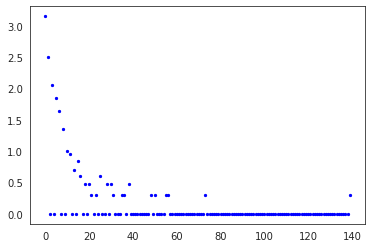

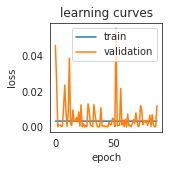

In [4]:
%%time
if RUN_DNN:
    nn = 'DNN'
    trials_out[nn] = trial(nn=nn, N_range=N_RANGE, hstack_zeros=False, random_states=RANDOM_STATES)
    debug_summary(trials_out[nn])


# DNN zeros

Processing...

input.shape: (10000, 44)
N: 32  avg_sqrt_mse = 0.04341

input.shape: (10000, 30)
N: 64  avg_sqrt_mse = 0.01435

input.shape: (10000, 56)
N: 128  avg_sqrt_mse = 0.01506

input.shape: (10000, 31)
N: 256  avg_sqrt_mse = 0.01066

input.shape: (10000, 43)
N: 512  avg_sqrt_mse = 0.00798

input.shape: (10000, 73)
N: 1024  avg_sqrt_mse = 0.01143

input.shape: (10000, 150)
N: 2048  avg_sqrt_mse = 0.00789

loss: 0.00322374
val_loss: 0.00003424
CPU times: user 1h 11min 17s, sys: 6min 19s, total: 1h 17min 36s
Wall time: 30min 20s


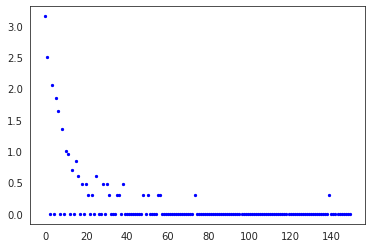

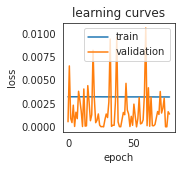

In [5]:
%%time
if RUN_DNN_ZEROS:
    nn = 'DNN_ZEROS'
    trials_out[nn] = trial(nn=nn, N_range=N_RANGE, hstack_zeros=True, random_states=RANDOM_STATES)
    debug_summary(trials_out[nn])

# DNN sliding-avg test

In [6]:
X_moving_avg_test = np.array([ [1,2,3,4,5,6,7], [1,2,3,4,5,6,7] ])

print('X_moving_avg_test:')
print(X_moving_avg_test)

OUT_moving_avg_test, window_sizes = data_hstack_moving_avg(X_moving_avg_test)

print()
print('window_sizes:', window_sizes)

print()
print('OUT_moving_avg_test:')
print(OUT_moving_avg_test)

X_moving_avg_test:
[[1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7]]

window_sizes: [2, 4]

OUT_moving_avg_test:
[[1.  2.  3.  4.  5.  6.  7.  1.5 2.5 3.5 4.5 5.5 6.5 2.5 3.5 4.5 5.5]
 [1.  2.  3.  4.  5.  6.  7.  1.5 2.5 3.5 4.5 5.5 6.5 2.5 3.5 4.5 5.5]]


# DNN sliding-avg

In [7]:
%%time
if RUN_DNN_WIN_SLIDING_AVG:
    nn = 'DNN_SLIDING_AVG'
    trials_out[nn] = trial(nn=nn, N_range=N_RANGE, hstack_zeros=False, random_states=RANDOM_STATES)
    debug_summary(trials_out[nn])

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.63 µs


# DNN sliding-avg zeros

In [8]:
%%time
if RUN_DNN_WIN_SLIDING_AVG_ZEROS:
    nn = 'DNN_SLIDING_AVG'
    trials_out[nn] = trial(nn=nn, N_range=N_RANGE, hstack_zeros=True, random_states=RANDOM_STATES)
    debug_summary(trials_out[nn])

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.91 µs


# DNN sliding-sum

In [9]:
%%time
if RUN_DNN_SLIDING_SUM:
    nn = 'DNN_SLIDING_SUM'
    trials_out[nn] = trial(nn=nn, N_range=N_RANGE, hstack_zeros=False, random_states=RANDOM_STATES)
    debug_summary(trials_out[nn])

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.44 µs


# DNN sliding-sum zeros

In [10]:
%%time
if RUN_DNN_SLIDING_SUM_ZEROS:
    nn = 'DNN_SLIDING_SUM_ZEROS'
    trials_out[nn] = trial(nn=nn, N_range=N_RANGE, hstack_zeros=True, random_states=RANDOM_STATES)
    debug_summary(trials_out[nn])

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.91 µs


# DNN win test
Test to show that 'data_hstack_win_sum()' is working correctly

In [11]:
X_win_test = np.array([ [1,2,3,4,5,6,7], [1,2,3,4,5,6,7] ])

print('X_win_test:')
print(X_win_test)

OUT_win_test, window_sizes = data_hstack_win_sum(X_win_test)

print()
print('window_sizes:', window_sizes)

print()
print('OUT_win_test:')
print(OUT_win_test)

X_win_test:
[[1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7]]

window_sizes: [2, 4]

OUT_win_test:
[[ 1  2  3  4  5  6  7  3  7 11 10]
 [ 1  2  3  4  5  6  7  3  7 11 10]]


# DNN win

In [12]:
%%time
if RUN_DNN_WIN:
    nn = 'DNN_WIN'
    trials_out[nn] = trial(nn=nn, N_range=N_RANGE, hstack_zeros=False, random_states=RANDOM_STATES)
    debug_summary(trials_out[nn])

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.63 µs


# DNN win zeros

In [13]:
%%time
if RUN_DNN_WIN_ZEROS:
    nn = 'DNN_WIN_ZEROS'
    trials_out[nn] = trial(nn=nn, N_range=N_RANGE, hstack_zeros=True, random_states=RANDOM_STATES)
    debug_summary(trials_out[nn])

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.68 µs


# CNN

Processing...

input.shape: (10000, 34, 1)
N: 32  avg_sqrt_mse = 0.04104

input.shape: (10000, 20, 1)
N: 64  avg_sqrt_mse = 0.01080

input.shape: (10000, 46, 1)
N: 128  avg_sqrt_mse = 0.01146

input.shape: (10000, 21, 1)
N: 256  avg_sqrt_mse = 0.00498

input.shape: (10000, 33, 1)
N: 512  avg_sqrt_mse = 0.00365

input.shape: (10000, 63, 1)
N: 1024  avg_sqrt_mse = 0.00219

input.shape: (10000, 140, 1)
N: 2048  avg_sqrt_mse = 0.00122

loss: 0.00000062
val_loss: 0.00000048
CPU times: user 1h 4min 33s, sys: 4min 32s, total: 1h 9min 6s
Wall time: 33min 37s


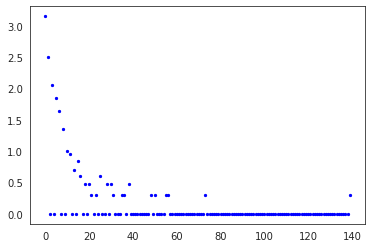

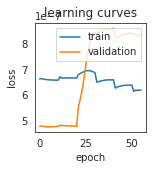

In [14]:
%%time
if RUN_CNN:
    nn = 'CNN'
    trials_out[nn] = trial(nn=nn, N_range=N_RANGE, hstack_zeros=False, random_states=RANDOM_STATES)
    debug_summary(trials_out[nn])

# CNN zeros

Processing...

input.shape: (10000, 44, 1)
N: 32  avg_sqrt_mse = 0.04111

input.shape: (10000, 30, 1)
N: 64  avg_sqrt_mse = 0.01085

input.shape: (10000, 56, 1)
N: 128  avg_sqrt_mse = 0.01161

input.shape: (10000, 31, 1)
N: 256  avg_sqrt_mse = 0.00483

input.shape: (10000, 43, 1)
N: 512  avg_sqrt_mse = 0.00329

input.shape: (10000, 73, 1)
N: 1024  avg_sqrt_mse = 0.00229

input.shape: (10000, 150, 1)
N: 2048  avg_sqrt_mse = 0.00110

loss: 0.00000067
val_loss: 0.00000051
CPU times: user 1h 15min 32s, sys: 5min 14s, total: 1h 20min 47s
Wall time: 38min 53s


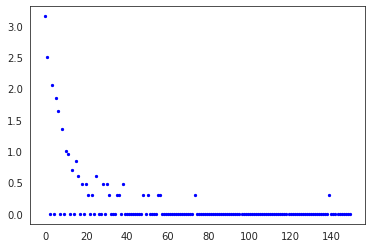

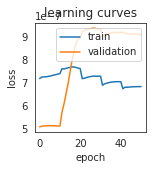

In [15]:
%%time
if RUN_CNN_ZEROS:
    nn = 'CNN_ZEROS'
    trials_out[nn] = trial(nn=nn, N_range=N_RANGE, hstack_zeros=True, random_states=RANDOM_STATES)
    debug_summary(trials_out[nn])

# CNN multi-layer

Processing...

input.shape: (10000, 34, 1)
N: 32  avg_sqrt_mse = 0.04095

input.shape: (10000, 20, 1)
N: 64  avg_sqrt_mse = 0.01097

input.shape: (10000, 46, 1)
N: 128  avg_sqrt_mse = 0.01028

input.shape: (10000, 21, 1)
N: 256  avg_sqrt_mse = 0.00474

input.shape: (10000, 33, 1)
N: 512  avg_sqrt_mse = 0.00302

input.shape: (10000, 63, 1)
N: 1024  avg_sqrt_mse = 0.00158

input.shape: (10000, 140, 1)
N: 2048  avg_sqrt_mse = 0.00096

loss: 0.00000072
val_loss: 0.00000072
CPU times: user 2h 19min 28s, sys: 8min 14s, total: 2h 27min 42s
Wall time: 51min 35s


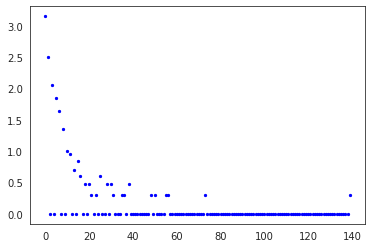

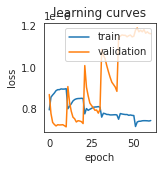

In [16]:
%%time
if RUN_CNNM:
    nn = 'CNNM'
    trials_out[nn] = trial(nn=nn, N_range=N_RANGE, hstack_zeros=False, random_states=RANDOM_STATES)
    debug_summary(trials_out[nn])

# CNN multi-layer + zeros

Processing...

input.shape: (10000, 44, 1)
N: 32  avg_sqrt_mse = 0.04150

input.shape: (10000, 30, 1)
N: 64  avg_sqrt_mse = 0.01094

input.shape: (10000, 56, 1)
N: 128  avg_sqrt_mse = 0.01075

input.shape: (10000, 31, 1)
N: 256  avg_sqrt_mse = 0.00438

input.shape: (10000, 43, 1)
N: 512  avg_sqrt_mse = 0.00274

input.shape: (10000, 73, 1)
N: 1024  avg_sqrt_mse = 0.00159

input.shape: (10000, 150, 1)
N: 2048  avg_sqrt_mse = 0.00068

loss: 0.00000022
val_loss: 0.00000021
CPU times: user 3h 2min 26s, sys: 9min 46s, total: 3h 12min 12s
Wall time: 1h 3min 38s


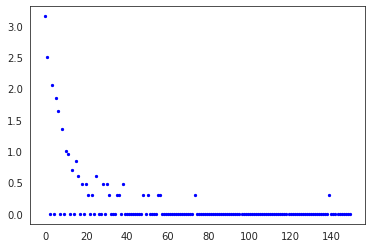

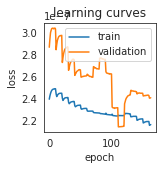

In [17]:
%%time
if RUN_CNNM:
    nn = 'CNNM_ZEROS'
    trials_out[nn] = trial(nn=nn, N_range=N_RANGE, hstack_zeros=True, random_states=RANDOM_STATES)
    debug_summary(trials_out[nn])

# plot log(N) vs sqrt_mse (all trials)

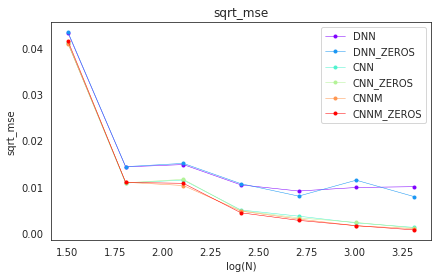

In [18]:
def plot_sqrt_mse(plot_std=False):
    
    plt.figure(figsize=(15, 4))
    
    ax1 = plt.subplot(1, 2, 1)

    ax1.set(title='sqrt_mse', xlabel='log(N)', ylabel='sqrt_mse')

    colors = iter(cm.rainbow(np.linspace(0, 1, len(trials_out))))

    for trial in trials_out:
        out = trials_out[trial]
        x = np.log10(out['a_N'])
        y = out['a_sqrt_mse']
        c = next(colors)
        ax1.plot(x, y, linewidth=0.5, c=c, marker='o', markersize=3, label=trial)
        if plot_std:
            std = out['a_std_abs_errors']
            ax1.fill_between(x, y - std, y + std, facecolor=colors[i], alpha=0.3)
    
    plt.legend(loc='upper right')

plot_sqrt_mse()


# print and save statistics (yulesimon.csv)

In [19]:
dict_list = []
for trial in trials_out:
    t = trials_out[trial]
    dict_list.append(('N', t['a_N']))
for trial in trials_out:
    t = trials_out[trial]
    dict_list.append(('sqrt_mse_{}'.format(trial), t['a_sqrt_mse']))
for trial in trials_out:
    t = trials_out[trial]
    dict_list.append(('std_{}'.format(trial), t['a_std_abs_errors']))
for trial in trials_out:
    t = trials_out[trial]
    dict_list.append(('avg_abs_error_{}'.format(trial), t['a_avg_abs_errors']))

df = pd.DataFrame(dict(dict_list))

df = df.set_index('N')

df.to_csv('yulesimon.csv', float_format='%.5f')

columns=[]
for t in trials_out:
    columns.append(('sqrt_MSE', trial))
for t in trials_out:
    columns.append(('STD', trial))
for t in trials_out:
    columns.append(('avg_abs_err', trial))

df.columns=pd.MultiIndex.from_tuples(columns)

print('err = y_test - y_pred')
df

err = y_test - y_pred


sqrt_MSE                                                         \
     CNNM_ZEROS CNNM_ZEROS CNNM_ZEROS CNNM_ZEROS CNNM_ZEROS CNNM_ZEROS   
N                                                                        
32     0.043260   0.043405   0.041040   0.041108   0.040951   0.041504   
64     0.014299   0.014351   0.010801   0.010851   0.010968   0.010939   
128    0.014803   0.015061   0.011461   0.011613   0.010276   0.010751   
256    0.010409   0.010662   0.004984   0.004832   0.004736   0.004380   
512    0.009084   0.007984   0.003653   0.003293   0.003019   0.002745   
1024   0.009846   0.011425   0.002195   0.002291   0.001577   0.001586   
2048   0.010022   0.007886   0.001215   0.001096   0.000956   0.000675   

            STD                                                         \
     CNNM_ZEROS CNNM_ZEROS CNNM_ZEROS CNNM_ZEROS CNNM_ZEROS CNNM_ZEROS   
N                                                                        
32     0.023159   0.023944   0.025286   0.025220   0.025482   0.024870   
64     0.006112   0.005835   0.007213   0.007136   0.007140   0.007112   
128    0.007661   0.007169   0.007652   0.007497   0.006669   0.006585   
256    0.003591   0.002905   0.003501   0.003425   0.002951   0.003059   
512    0.002553   0.002169   0.002071   0.002125   0.001828   0.001911   
1024   0.001992   0.003733   0.001593   0.001700   0.001009   0.001019   
2048   0.003038   0.001441   0.000609   0.000606   0.000533   0.000425   

     avg_abs_err                                                         
      CNNM_ZEROS CNNM_ZEROS CNNM_ZEROS CNNM_ZEROS CNNM_ZEROS CNNM_ZEROS  
N                                                                        
32      0.034554   0.034369   0.031745   0.031799   0.031606   0.032199  
64      0.011205   0.011350   0.007880   0.007954   0.007961   0.007966  
128     0.011365   0.011263   0.008075   0.008314   0.007274   0.007633  
256     0.008288   0.008538   0.003397   0.003287   0.003304   0.002882  
512     0.007459   0.006467   0.002613   0.002235   0.002012   0.001772  
1024    0.008150   0.009331   0.001378   0.001408   0.001065   0.001057  
2048    0.008145   0.006504   0.000886   0.000767   0.000684   0.000442

## $mse$ comparison

In [27]:
dict_list_mse = []
for trial in trials_out:
    t = trials_out[trial]
    dict_list_mse.append(('N', t['a_N']))
    dict_list_mse.append((f'{trial}', t['a_sqrt_mse']))

df = pd.DataFrame(dict(dict_list_mse))

df = df.set_index('N')

df

,DNN,DNN_ZEROS,CNN,CNN_ZEROS,CNNM,CNNM_ZEROS
N,,,,,,
32,0.043260,0.043405,0.041040,0.041108,0.040951,0.041504
64,0.014299,0.014351,0.010801,0.010851,0.010968,0.010939
128,0.014803,0.015061,0.011461,0.011613,0.010276,0.010751
256,0.010409,0.010662,0.004984,0.004832,0.004736,0.004380
512,0.009084,0.007984,0.003653,0.003293,0.003019,0.002745
1024,0.009846,0.011425,0.002195,0.002291,0.001577,0.001586
2048,0.010022,0.007886,0.001215,0.001096,0.000956,0.000675


## $STD$ comparison

In [31]:
dict_list_std = []
for trial in trials_out:
    t = trials_out[trial]
    dict_list_std.append(('N', t['a_N']))
    dict_list_std.append((f'{trial}', t['a_std_abs_errors']))

df = pd.DataFrame(dict(dict_list_std))

df = df.set_index('N')
print(df)

           DNN  DNN_ZEROS       CNN  CNN_ZEROS      CNNM  CNNM_ZEROS
N                                                                   
32    0.023159   0.023944  0.025286   0.025220  0.025482    0.024870
64    0.006112   0.005835  0.007213   0.007136  0.007140    0.007112
128   0.007661   0.007169  0.007652   0.007497  0.006669    0.006585
256   0.003591   0.002905  0.003501   0.003425  0.002951    0.003059
512   0.002553   0.002169  0.002071   0.002125  0.001828    0.001911
1024  0.001992   0.003733  0.001593   0.001700  0.001009    0.001019
2048  0.003038   0.001441  0.000609   0.000606  0.000533    0.000425
